Name: Jonathan Au<br>
Student#: 300827701

##Exercise 1

Write a Python program to classify letters from different fonts using delta rule learning. The training set contains 21 input vectors (patterns) shown below:<br>
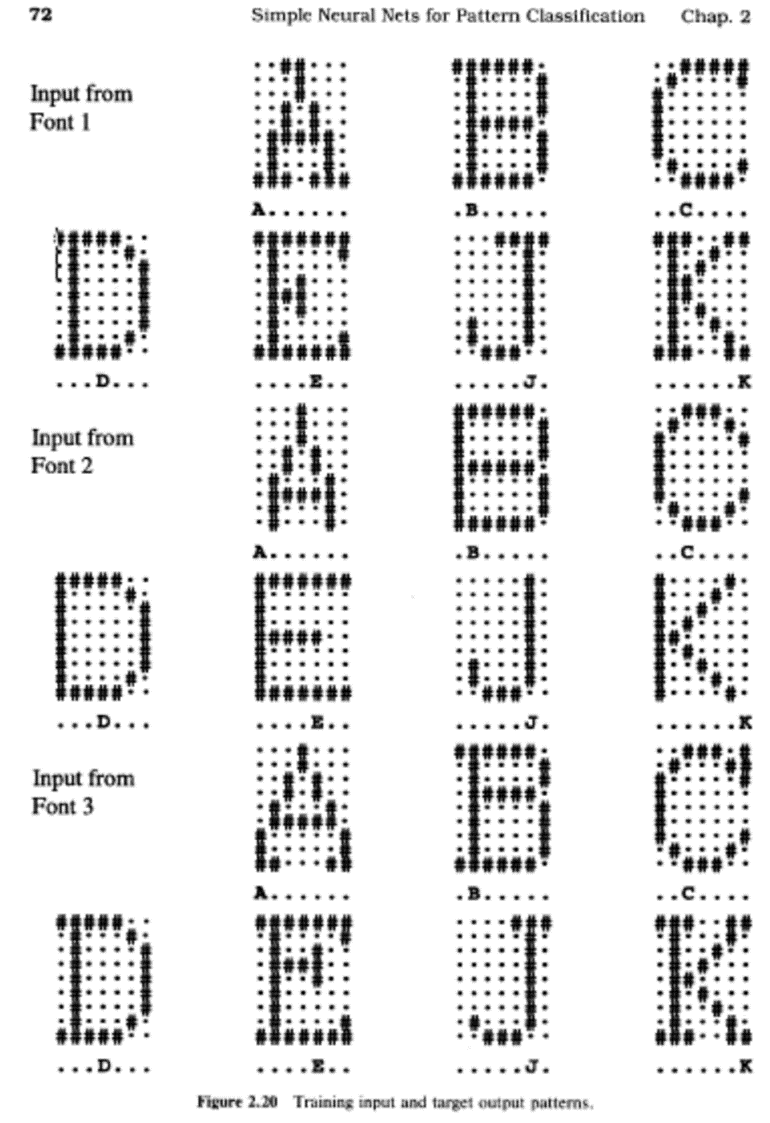
<br>
Each input vector is a 63-tuple representing a letter expressed as a pattern on a 7 x 9 grid of pixels.<br>

Convert the letters to bipolar form. (You may wish to enter the letters as "2" if the pixel is on and "0" if it is off to facilitate testing with noisy patterns after training; your program should subtract 1 from each component of the input pattern to obtain the bipolar vector.)<br>

For example, the first pattern can be represented by the vector:<br>

[0,0,2,2,0,0,0, 0,0,0,2,0,0,0,  0,0,0,2,0,0,0,……, 2,2,2,0,2,2,2]<br>

Now you can subtract 1 from each component to obtain the bipolar representation:
<br>
[-1,-1,1,1,-1,-1,-1, -1,-1,-1,1,-1,-1,-1,  -1,-1,-1,1,-1,-1,-1,……, 1,1,1,-1,1,1,1]<br>

As the first example of using the perceptron for character recognition, consider the 21 input patterns in Figure 2.20 as examples of A or not-A (if your first name starts with a letter from A-D inclusively), B or not-B (if your first name starts with a letter from E-K inclusively, C or not-C (if your first name starts with a letter from L-R inclusively), and D or not-D (if your first name starts with a letter from S-Z inclusively).<br>

In other words, we train the perceptron to classify each of these vectors as belonging, or not belonging, to the class A (or B, C, D as stated above). In that case, the target value for each pattern is either 1 or - 1; only the first component of the target vector shown is applicable. The net is as shown below, and n = 63. <br>

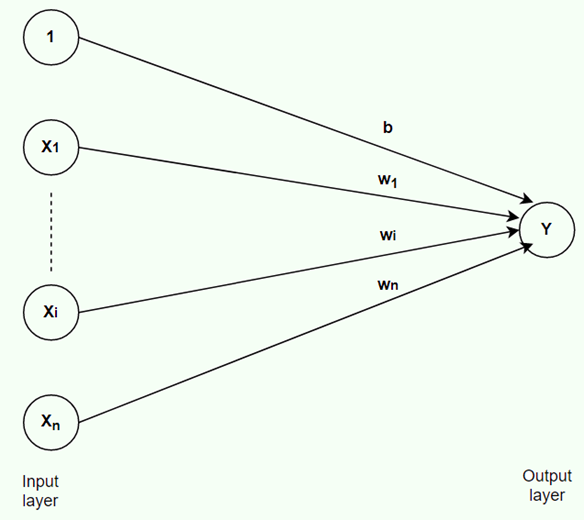
<br>
There are three examples of A and 18 examples of not-A in the training set.
<br>
a)	First, classify the input using perceptron.<br>
b)	Then, classify the input using ADALINE and compare the ability of the trained ADALINE to classify noisy input to the results for the perceptron. Try 5, 10, 15, 20 pixels wrong and the same levels of missing data.
<br>
Your output should display the results of classification in a friendly format and state the differences between two algorithms regarding handling noise and missing data.<br>
											(4 marks)




In [10]:
#All Imports
import numpy as np

tuples

In [27]:
#Contains all the manually inputted tuples
#Font 1
font1 = {
#A
'A': [0,0,2,2,0,0,0, 0,0,0,2,0,0,0, 0,0,0,2,0,0,0, 0,0,2,0,2,0,0, 0,0,2,0,2,0,0, 0,2,2,2,2,2,0, 0,2,0,0,0,2,0, 0,2,0,0,0,2,0, 2,2,2,0,2,2,2],
#B
'B': [2,2,2,2,2,2,0, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,2,2,2,2,0, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 2,2,2,2,2,2,0],
#C
'C': [0,0,2,2,2,2,2, 0,2,0,0,0,0,2, 2,0,0,0,0,0,0, 2,0,0,0,0,0,0, 2,0,0,0,0,0,0, 2,0,0,0,0,0,0, 2,0,0,0,0,0,0, 0,2,0,0,0,0,2, 0,0,2,2,2,2,0],
#D
'D': [2,2,2,2,2,0,0, 0,2,0,0,0,2,0, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,0,0,0,2,0, 2,2,2,2,2,0,0],
#E
'E': [2,2,2,2,2,2,2, 0,2,0,0,0,0,2, 0,2,0,0,0,0,0, 0,2,0,2,0,0,0, 0,2,2,2,0,0,0, 0,2,0,2,0,0,0, 0,2,0,0,0,0,0, 0,2,0,0,0,0,2, 2,2,2,2,2,2,2],
#J
'J': [0,0,0,2,2,2,2, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,2,0,0,0,2,0, 0,2,0,0,0,2,0, 0,0,2,2,2,0,0],
#K
'K': [2,2,2,0,0,2,2, 0,2,0,0,2,0,0, 0,2,0,2,0,0,0, 0,2,2,0,0,0,0, 0,2,2,0,0,0,0, 0,2,0,2,0,0,0, 0,2,0,0,2,0,0, 0,2,0,0,0,2,0, 2,2,2,0,0,2,2]
}

font2 = {
#Font 2
#A
'A': [0,0,0,2,0,0,0, 0,0,0,2,0,0,0, 0,0,0,2,0,0,0, 0,0,2,0,2,0,0, 0,0,2,0,2,0,0, 0,2,0,0,0,2,0, 0,2,2,2,2,2,0, 0,2,0,0,0,2,0, 0,2,0,0,0,2,0],
#B
'B': [2,2,2,2,2,2,0, 2,0,0,0,0,0,2, 2,0,0,0,0,0,2, 2,0,0,0,0,0,2, 2,2,2,2,2,2,0, 2,0,0,0,0,0,2, 2,0,0,0,0,0,2, 2,0,0,0,0,0,2, 2,2,2,2,2,2,0],
#C
'C': [0,0,2,2,2,0,0, 0,2,0,0,0,2,0, 2,0,0,0,0,0,2, 2,0,0,0,0,0,0, 2,0,0,0,0,0,0, 2,0,0,0,0,0,0, 2,0,0,0,0,0,2, 0,2,0,0,0,2,0, 0,0,2,2,2,0,0],
#D
'D': [2,2,2,2,2,0,0, 2,0,0,0,0,2,0, 2,0,0,0,0,0,2, 2,0,0,0,0,0,2, 2,0,0,0,0,0,2, 2,0,0,0,0,0,2, 2,0,0,0,0,0,2, 2,0,0,0,0,2,0, 2,2,2,2,2,0,0],
#E
'E': [2,2,2,2,2,2,2, 2,0,0,0,0,0,0, 2,0,0,0,0,0,0, 2,0,0,0,0,0,0, 2,2,2,2,2,0,0, 2,0,0,0,0,0,0, 2,0,0,0,0,0,0, 2,0,0,0,0,0,0, 2,2,2,2,2,2,2],
#J
'J': [0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,2,0,0,0,2,0, 0,2,0,0,0,2,0, 0,0,2,2,2,0,0],
#K
'K': [2,0,0,0,0,2,0, 2,0,0,0,2,0,0, 2,0,0,2,0,0,0, 2,0,2,0,0,0,0, 2,2,0,0,0,0,0, 2,0,2,0,0,0,0, 2,0,0,2,0,0,0, 2,0,0,0,2,0,0, 2,0,0,0,0,2,0]
}

font3 = {
#Font 2
#A
'A': [0,0,0,2,0,0,0, 0,0,0,2,0,0,0, 0,0,2,0,2,0,0, 0,0,2,0,2,0,0, 0,2,0,0,0,2,0, 0,2,2,2,2,2,0, 2,0,0,0,0,0,2, 2,0,0,0,0,0,2, 2,2,0,0,0,2,2],
#B
'B': [2,2,2,2,2,2,0, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,2,2,2,2,0, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 2,2,2,2,2,2,0],
#C
'C': [0,0,2,2,2,0,2, 0,2,0,0,0,2,2, 2,0,0,0,0,0,2, 2,0,0,0,0,0,0, 2,0,0,0,0,0,0, 2,0,0,0,0,0,0, 2,0,0,0,0,0,2, 0,2,0,0,0,2,0, 0,0,2,2,2,0,0],
#D
'D': [2,2,2,2,2,0,0, 0,2,0,0,0,2,0, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,0,0,0,0,2, 0,2,0,0,0,2,0, 2,2,2,2,2,0,0],
#E
'E': [2,2,2,2,2,2,2, 0,2,0,0,0,0,2, 0,2,0,0,2,0,0, 0,2,2,2,2,0,0, 0,2,0,0,2,0,0, 0,2,0,0,0,0,0, 0,2,0,0,0,0,0, 0,2,0,0,0,0,2, 2,2,2,2,2,2,2],
#J
'J': [0,0,0,0,2,2,2, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,0,0,0,0,2,0, 0,2,0,0,0,2,0, 0,0,2,2,2,0,0],
#K
'K': [2,2,2,0,0,2,2, 0,2,0,0,0,2,0, 0,2,0,0,2,0,0, 0,2,0,2,0,0,0, 0,2,2,0,0,0,0, 0,2,0,2,0,0,0, 0,2,0,0,2,0,0, 0,2,0,0,0,2,0, 2,2,2,0,0,2,2]
}

#function to turn tuple letters into bipolar format
def bipolarFormat(f):
  for font in f:
    for letter in font:
      for i in range(len(font[letter])):
        font[letter][i] -= 1
    print(font, "\n")

#Function to determine whether or not it belongs to a certain letter
def confirmLetter(f, lettr):
  isCount = 0
  isNotCount = 0
  for font in f:
    for letter in font:
      if letter == lettr:
        print(letter)
        isCount += 1
      else:
        print('not '+ lettr)
        isNotCount += 1
    print("\n")
  print("There are " + str(isCount) + " " + lettr + "s and " + str(isNotCount) + " non " + lettr + "s")

#Runs Bipolar Format function
bipolarFormat((font1, font2, font3))
#bipolarFormat(font1)
#bipolarFormat(font2)
#bipolarFormat(font3)

#Runs the letter confirmation function
confirmLetter((font1, font2, font3), 'A')
#confirmLetter(font1, 'A')
#confirmLetter(font2, 'C')
#confirmLetter(font3, 'K')

{'A': [-1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1], 'B': [1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1], 'C': [-1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1], 'D': [1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1], 'E': [1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 

a) First, classify the input using perceptron.<br>


In [29]:
class PerceptronModel:
  def __init__(self, no_of_featues):
    self.weights = np.zeros(no_of_featues)
    self.bias = 0

  def predict(self,features):
    #calculate the weighted sum
    weighted_sum = np.dot(features, self.weights) + self.bias
    # use step function as activation function
    if weighted_sum > 0:
      return 1
    else:
      return 0

  def train(self, features, label):
    # Make a prediction based on current weights.
    prediction = self.predict(features)
    # Update the weights if the prediction is wrong.
    if prediction != label:
      gradient = label - prediction; # how far off are we?
      for i in range(len(self.weights)):
        self.weights[i] += gradient * features[i] #The perceptron update rule
      self.bias += gradient;
    return self # return weights and bias

percept = PerceptronModel(63)
for i in range (0,100):
  percept.train(np.array(font1['A']), 1) #The model doesn't look at the key and instead looks at the actual values
  percept.train(np.array(font1['B']), 0) #Thus it is possible to change the key to say "X" and still get the same answer
  percept.train(np.array(font1['C']), 0) #As compared to the letter checking function
  percept.train(np.array(font1['D']), 0)
  percept.train(np.array(font1['E']), 0)
  percept.train(np.array(font1['J']), 0)
  percept.train(np.array(font1['K']), 0)

print(percept.predict(np.array(font3['A'])))
print(percept.predict(np.array(font2['D'])))
print(percept.predict(np.array(font3['K'])))
print(percept.predict(np.array(font2['A'])))

1
0
0
1


b) Then, classify the input using ADALINE and compare the ability of the trained ADALINE to classify noisy input to the results for the perceptron. Try 5, 10, 15, 20 pixels wrong and the same levels of missing data.<br>
Your output should display the results of classification in a friendly format and state the differences between two algorithms regarding handling noise and missing data.

In [43]:
class Adaline(object):
  def __init__(self, input_no, epoch=100, learn_rate=0.01):
    self.epoch = epoch
    self.learn_rate = learn_rate
    self.weights = np.zeros(input_no +1)
    self.cost = []

  def activation(self, x):
    return x

  def predict(self, inputs):
    return self.activation(np.dot(inputs, self.weights[1:]) + self.weights[0])

  def train(self, train_inputs, labels):
    for _ in range(self.epoch):
      output = np.array([self.predict(inputs) for inputs in train_inputs])
      errors = labels - output #Changing this value does seem to have adverse affects
      self.weights[1:] += self.learn_rate * np.dot(train_inputs.T, errors)
      self.weights[0] += self.learn_rate * errors.sum()

      cost = (errors**2).sum() /2.0
      self.cost.append(cost)
      #Any change in the error values does not seem to affect the results

ada = Adaline(63)
train_data =  np.array(list(font1.values()))
labels = np.array([1, 0, 0, 0, 0, 0, 0])
ada.train(train_data, labels)
print("Prediction for font2 A: ", ada.predict(np.array(font2['A'])))
print("Prediction for font3 B: ", ada.predict(np.array(font3['B'])))

print("Prediction for font3 A: ", ada.predict(np.array(font3['A'])))
print("Prediction for font3 E: ", ada.predict(np.array(font2['E'])))

Prediction for font2 A:  0.5840140639892665
Prediction for font3 B:  0.0038910819403631565
Prediction for font3 A:  0.5047849836836776
Prediction for font3 E:  0.04723181281651877


##Exercise 2

Write a Python program to train the model and use the following multilayer ANN to predict the output for class Die_Live:
- Die_Live 1:       1,	0
- Die_Live 2:       0,	1

The set of data is from http://archive.ics.uci.edu/ml/datasets/Hepatitis. <br>
Number of Instances: 155<br>
Number of Attributes: 20 (including the class attribute)

Replace all missing records with a single and unique value, which is the mean value of that attribute.

Use a multilayer ANN (19-30-15-2).<br>
Input layer – 19 neurons<br>
Second layer – 30 neurons<br>
Third layer – 15 neurons<br>
Output layer – 2 neurons<br>
Activation function for all layers – sigmoid.

Make the necessary adjustments to the net architecture to achieve a high accuracy.


In [8]:
#EX2 Imports
import os
import json
import numpy as np


In [6]:
# Other functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [7]:
class Network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y,x) for x, y, in zip(sizes[:-1], sizes[1:])]

    def feedfwd(self, sigmd):
        for b, w in zip(self.biases, self.weights):
            sigmd = sigmoid(np.dot(w, sigmd)+b)
        return sigmd

    def SGD(self, train_data, epochs, mini_batch_size, eta, test_data=None):
        train_data = list(train_data)
        n = len(train_data)
        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(train_data)
            mini_batchs = [
                train_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batchs:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {} : {} / {}".format(j, self.evaluate(test_data), n_test));
            else:
                print("Epoch {} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

In [ ]:
test_path = './JSON files/hepatitis_testing_data.json'
train_path = './JSON files/hepatitis_training_data.json'

print("Printing Test Data: ")
with open(test_path, 'r') as file:
  test_data_file = json.load(file)
print(test_data_file, "\n")

print("Printing Train Data: ")
with open(train_path, 'r') as file:
  train_data_file = json.load(file)
#print(train_data_file)

train_data = list(train_data)
netwrk = Network([19, 30, 15, 2])
netwrk.SGD(test_data_file, 30, 10, 3.0, test_data = train_data_file)

##Demonstration Video Recording

Please record a short video (max 3-4 minutes) to demonstrate your assignment solution. You may use the Windows 10 Game bar to do the recording:

1. Press the Windows key + G at the same time to open the Game Bar dialog.
2. Check the "Yes, this is a game" checkbox to load the Game Bar.
3. Click on the Start Recording button (or Win + Alt + R) to begin capturing the video.
4. Stop the recording by clicking on the red recording bar that will be on the top right of the program window.
(If it disappears on you, press Win + G again to bring the Game Bar back.)

You'll find your recorded video (MP4 file), under the Videos folder in a subfolder called Captures.

Submit the video together with your solution.
